<a href="https://colab.research.google.com/github/fabio-baum/ia_para_engenheiros2/blob/main/Aula_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
df = pd.read_excel(url)

In [4]:
# Rename columns for better readability
column_names = [
    'Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water',
    'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Compressive_Strength'
]
df.columns = column_names

In [5]:
# Separate features and target
X = df.drop('Compressive_Strength', axis=1)
y = df['Compressive_Strength']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression (no activation)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae']  # Mean Absolute Error
)

In [11]:
print("\nModel architecture:")
model.summary()


Model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True
)

In [13]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    factor=0.5,
    patience=10
)

In [14]:
# Train the model
print("\nTraining the model...")
history = model.fit(
    X_train_scaled, y_train,
    batch_size=32,
    epochs=200,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Training the model...
Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1516.0594 - mae: 35.1161 - val_loss: 1366.6620 - val_mae: 33.6642 - learning_rate: 0.0010
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1261.1384 - mae: 31.3266 - val_loss: 831.0176 - val_mae: 24.8841 - learning_rate: 0.0010
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 640.3165 - mae: 20.5337 - val_loss: 214.8181 - val_mae: 11.9764 - learning_rate: 0.0010
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 290.9422 - mae: 13.8635 - val_loss: 187.8401 - val_mae: 11.4056 - learning_rate: 0.0010
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 239.7317 - mae: 12.5486 - val_loss: 177.9848 - val_mae: 11.0969 - learning_rate: 0.0010
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 217.8858 - mae: 12.0588 - val_loss: 166.3977 - val_mae: 10.7972 - learning_rate: 0.0010
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 200.9788 - mae: 11.4646 - val_lo

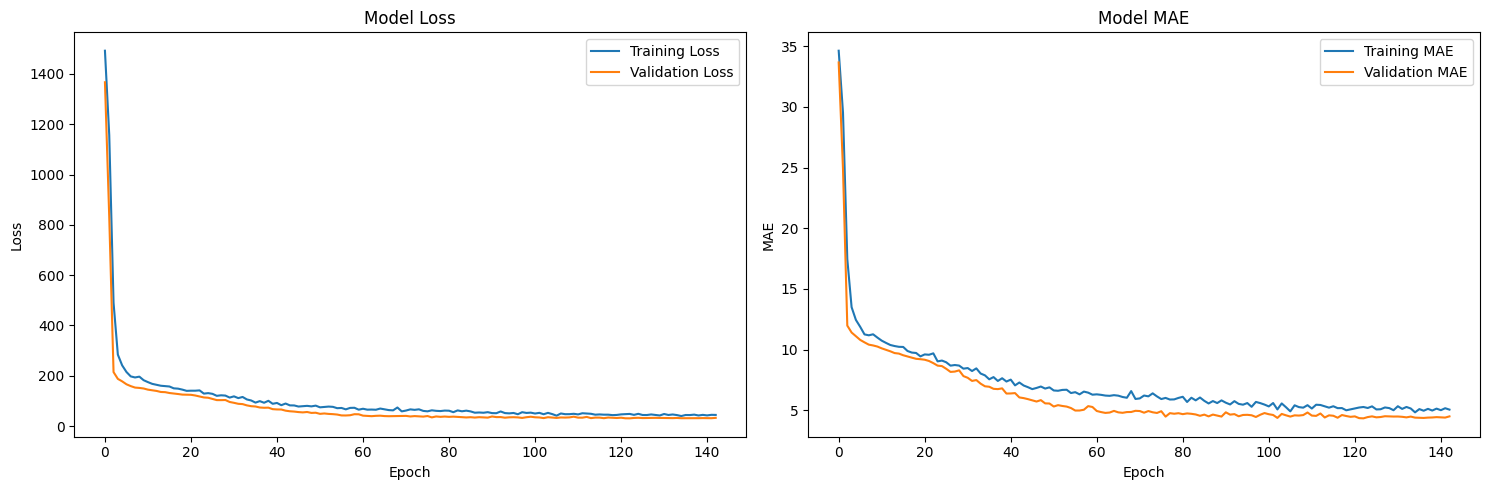

In [15]:
# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Evaluate the model on test data
print("\nEvaluating on test data...")
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


Evaluating on test data...
Test Loss (MSE): 35.5508
Test MAE: 4.6788


In [17]:
# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [18]:
# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nPerformance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Performance Metrics:
Mean Squared Error (MSE): 35.5508
Root Mean Squared Error (RMSE): 5.9625
Mean Absolute Error (MAE): 4.6788
R² Score: 0.8620


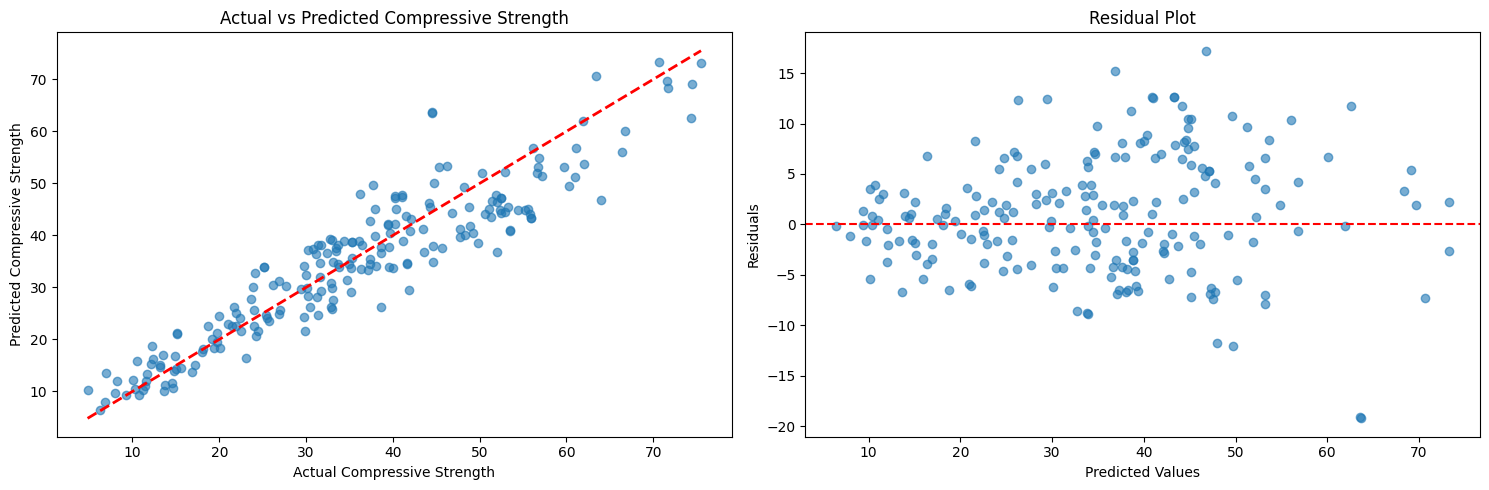

In [19]:
# Plot actual vs predicted values
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Compressive Strength')
plt.ylabel('Predicted Compressive Strength')
plt.title('Actual vs Predicted Compressive Strength')

# Plot residuals
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [25]:
# SHAP Importance Calculation
import shap


In [26]:
# Initialize SHAP explainer
explainer = shap.KernelExplainer(lambda data: model.predict(data).flatten(), X_train_scaled[:100])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [27]:
# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test_scaled[:100])  # Use subset for speed

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
794/794 ━━━━━━

/tmp/ipython-input-2721055678.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns, show=False)


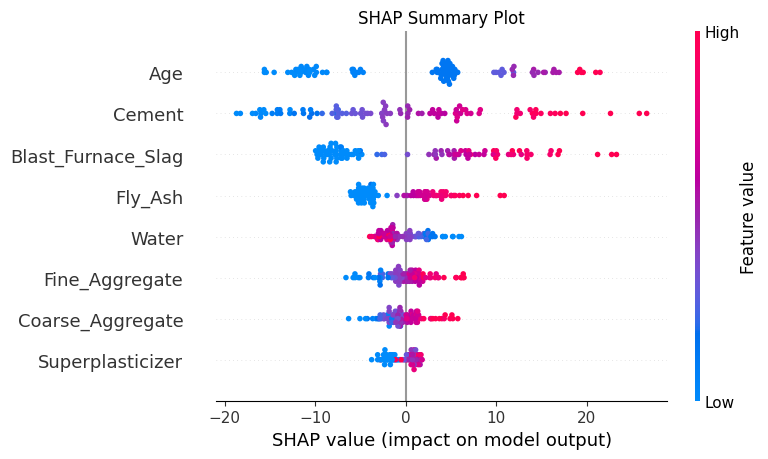

In [28]:
# Plot SHAP summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4262880288.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns, plot_type="bar", show=False)


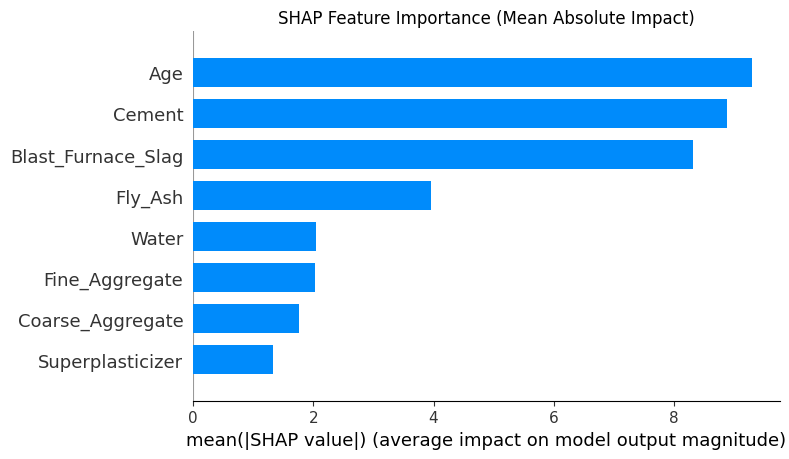

In [29]:
# Plot SHAP bar plot (mean absolute SHAP values)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Mean Absolute Impact)')
plt.tight_layout()
plt.show()

In [30]:
# Calculate mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'feature': X.columns,
    'shap_importance': mean_abs_shap
}).sort_values('shap_importance', ascending=False)

print("\nSHAP Feature Importance (sorted by importance):")
print(shap_importance_df)


SHAP Feature Importance (sorted by importance):
              feature  shap_importance
7                 Age         9.300167
0              Cement         8.884754
1  Blast_Furnace_Slag         8.318441
2             Fly_Ash         3.962060
3               Water         2.051506
6      Fine_Aggregate         2.031560
5    Coarse_Aggregate         1.761903
4    Superplasticizer         1.329752
